In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone = pd.read_csv('abalone.data', names=cols, header=None)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Confirmation that there is indeed no null values present
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
bins = [0, 8, 10, abalone['Rings'].max()]
group_names = ['young', 'medium', 'old']
age = pd.cut(abalone['Rings'], bins, labels=group_names)
abalone['Age'] = age
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,medium
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,medium
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,young


In [5]:
le = LabelEncoder()
abalone['Age_Encode'] = le.fit_transform(abalone['Age'])
abalone['Sex_Encode'] = le.fit_transform(abalone['Sex'])
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Age_Encode,Sex_Encode
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,old,1,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,young,2,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,medium,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,medium,0,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,young,2,1


In the scatterplots below, age groups ['young', 'medium', 'old'] correspond to ['green', 'blue', 'red']

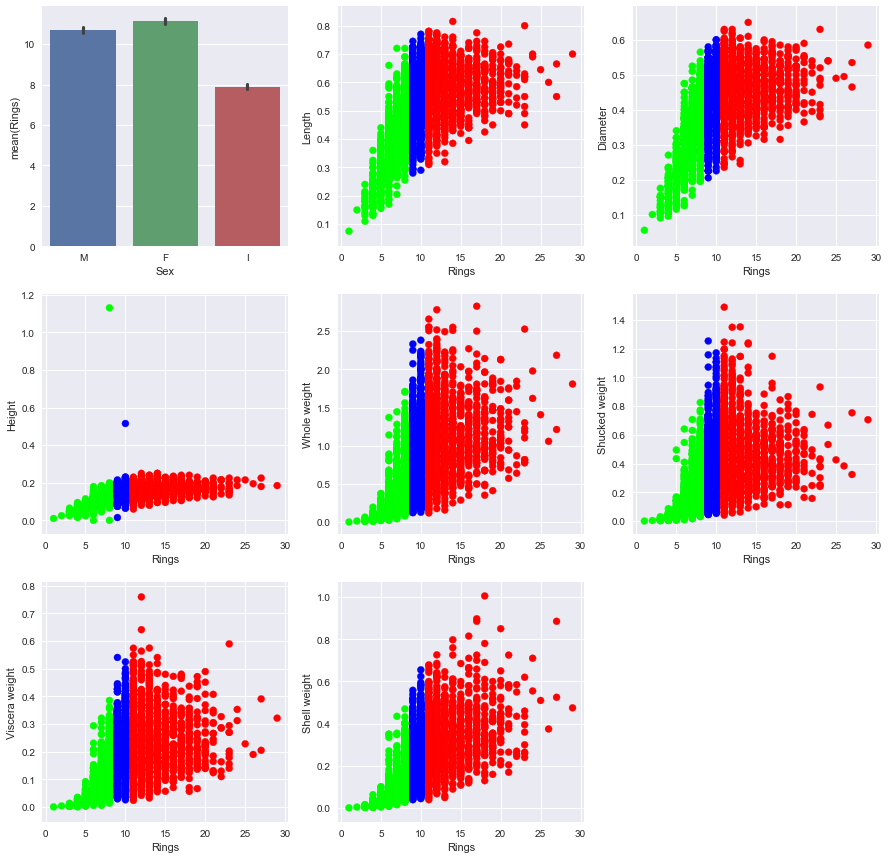

In [6]:
plt.figure(figsize=[15,15])
subplt = 331
for col in cols:
    if col=='Rings':
        break
    if col=='Sex':
        plt.subplot(subplt)
        sns.barplot(x=col, y='Rings', data=abalone)
        plt.plot()
        subplt += 1
    else:
        plt.subplot(subplt)
        plt.scatter(abalone['Rings'], abalone[col], c=abalone['Age_Encode'], cmap=plt.cm.brg)
        plt.xlabel('Rings')
        plt.ylabel(col)
        subplt += 1

* If an abalone is an infant, it is more likely to have less rings than males or females.
* Length and Diameter seem to be features that help identify abalone in the young category due to the large tail ends where there is no overlap between the other age groups.
* Height seems to be a bad indicator of age as there is not much spread between the age groups.
* The other features, on visual inspection alone, seem to have similar importance.

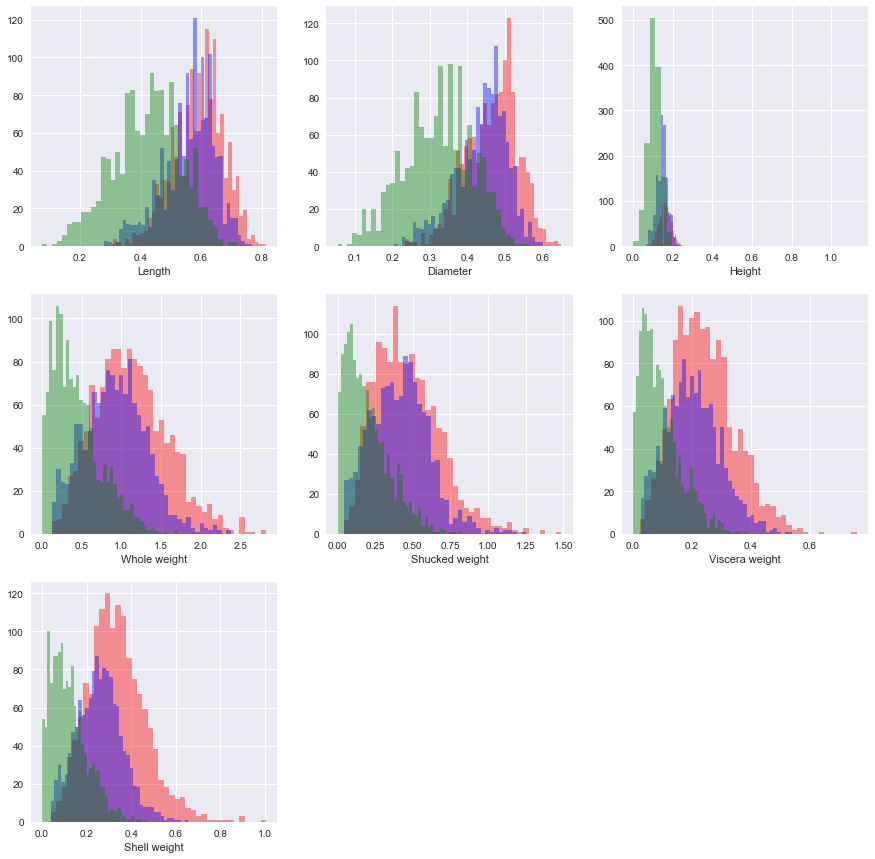

In [7]:
# Frequency counts on y axis
o = abalone[abalone['Age']=='old']
m = abalone[abalone['Age']=='medium']
y = abalone[abalone['Age']=='young']
plt.figure(figsize=[15,15])
sub = 331
for col in cols[1:-1]:
    plt.subplot(sub)
    sns.distplot(o[col], bins=40, kde=False, color="red")
    sns.distplot(m[col], bins=40, kde=False, color="blue")
    sns.distplot(y[col], bins=40, kde=False, color="green")
    sub+=1

In [8]:
# Null accuracy (accuracy obtained using the most common age group as a prediction for each sample)
pd.value_counts(abalone['Age']).max()/len(abalone['Age'])

0.34642087622695716

In [9]:
# Binarizing the categorical data
abalone = pd.concat([pd.get_dummies(abalone['Sex']), abalone], axis=1)
abalone = pd.concat([abalone, pd.get_dummies(abalone['Age']),], axis=1)
abalone.head()

,F,I,M,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Age_Encode,Sex_Encode,medium,old,young
0,0,0,1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,old,1,2,0,1,0
1,0,0,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,young,2,2,0,0,1
2,1,0,0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,medium,0,0,1,0,0
3,0,0,1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,medium,0,2,1,0,0
4,0,1,0,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,young,2,1,0,0,1


In [10]:
# Filtering out data that will be used
features = abalone[['F', 'I', 'M', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
labels = abalone[['young', 'medium', 'old']]

In [11]:
print(features[:5])
print(labels[:5])

   F  I  M  Length  Diameter  Height  Whole weight  Shucked weight  \
0  0  0  1   0.455     0.365   0.095        0.5140          0.2245   
1  0  0  1   0.350     0.265   0.090        0.2255          0.0995   
2  1  0  0   0.530     0.420   0.135        0.6770          0.2565   
3  0  0  1   0.440     0.365   0.125        0.5160          0.2155   
4  0  1  0   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  
0          0.1010         0.150  
1          0.0485         0.070  
2          0.1415         0.210  
3          0.1140         0.155  
4          0.0395         0.055  
   young  medium  old
0      0       0    1
1      1       0    0
2      0       1    0
3      0       1    0
4      1       0    0


In [12]:
# Conversion to numpy arrays for faster computation
features = np.asarray(features)
labels = np.asarray(labels)

In [13]:
print(features[:5])
print(labels[:5])

[[ 0.      0.      1.      0.455   0.365   0.095   0.514   0.2245  0.101
   0.15  ]
 [ 0.      0.      1.      0.35    0.265   0.09    0.2255  0.0995  0.0485
   0.07  ]
 [ 1.      0.      0.      0.53    0.42    0.135   0.677   0.2565  0.1415
   0.21  ]
 [ 0.      0.      1.      0.44    0.365   0.125   0.516   0.2155  0.114
   0.155 ]
 [ 0.      1.      0.      0.33    0.255   0.08    0.205   0.0895  0.0395
   0.055 ]]
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]]


In [14]:
class multi_class_classification():

    
    def __init__(self, X, y):
        self.X = X
        self.y = y
#         ops.reset_default_graph()
        
    
    def split_data(self, test_size=0.25, random_state=5):
        self.Xtrain, self.Xtest, self.ytrain, self.ytest = train_test_split(self.X, 
                                                                            self.y, 
                                                                            test_size=test_size, 
                                                                            random_state=random_state)

    
    def setup_graph(self, optimizer, learning_rate):
        self.graph = tf.Graph()
        with self.graph.as_default():
            # Placeholders
            self.x_data = tf.placeholder(shape=[None, self.X.shape[1]], dtype=tf.float32, name='X')
            self.y_target = tf.placeholder(shape=[None, self.y.shape[1]], dtype=tf.float32, name='Y')

            self.W = tf.Variable(tf.random_normal(shape=[self.X.shape[1], self.y.shape[1]]), name='weights')
            self.b = tf.Variable(tf.random_normal(shape=[self.y.shape[1]]), name='biases')

            
            self.y_pred = tf.add(tf.matmul(self.x_data, self.W), self.b)

            self.loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=self.y_pred, 
                                                                               labels=self.y_target))

            self.optimizer = optimizer(learning_rate)
            self.train_step = self.optimizer.minimize(self.loss)
            self.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.y_pred,1), 
                                                            tf.argmax(self.y_target,1)), tf.float32))
            
    '''In order to test this out on unseen data, just process it as shown above and then substitute the feature
       columns into newX to generate predictions once trained on all of the previously seen data.'''
    def run(self, epochs=1000, newX=None):
        
        # Just makes it to where the entire dataset is used to train the network
        if newX is not None:
            self.Xtrain, self.ytrain = self.X, self.y
            self.Xtest, self.ytest = self.X, self.y

        with tf.Session(graph=self.graph) as sess:
            init = tf.global_variables_initializer()
        sess.run(init)

        self.train_loss_vec = []
        self.test_loss_vec = []
        self.test_acc = []
        
        for i in range(epochs):

            sess.run(self.train_step, feed_dict={self.x_data:self.Xtrain, self.y_target:self.ytrain})
        
            temp_loss = sess.run(self.loss, feed_dict={self.x_data:self.Xtrain, self.y_target:self.ytrain})
            self.train_loss_vec.append(temp_loss)
            
            test_temp_loss = sess.run(self.loss, feed_dict={self.x_data:self.Xtest, self.y_target:self.ytest})
            self.test_loss_vec.append(test_temp_loss)
            
            test_accuracy = sess.run(self.accuracy, feed_dict={self.x_data:self.Xtest, self.y_target:self.ytest})
            self.test_acc.append(test_accuracy)
            if (i+1)%50==0:
                print('Epoch: {0} | Loss: {1}'.format(i+1, temp_loss))
                
            if (i+1)%epochs==0:
                # When predicting labels for a new dataset
                if newX is not None:
                    test_preds = sess.run(self.y_pred, feed_dict={self.x_data:newX})
                    self.test_preds = test_preds

In [15]:
predictor = multi_class_classification(X=features, y=labels)
predictor.split_data()

In [16]:
learning_rates = [0.01, 0.1, 1.0, 10, 100]

adam_acc_scores = []
adam_train_loss_scores = []
adam_test_loss_scores = []

gdo_acc_scores = []
gdo_train_loss_scores = []
gdo_test_loss_scores = []

for rate in learning_rates:
    
    predictor.setup_graph(optimizer=tf.train.AdamOptimizer, learning_rate=rate)
    predictor.run(epochs=2000)
    adam_acc_scores.append(predictor.test_acc)
    adam_train_loss_scores.append(predictor.train_loss_vec)
    adam_test_loss_scores.append(predictor.train_loss_vec)
    
    predictor.setup_graph(optimizer=tf.train.GradientDescentOptimizer, learning_rate=rate)
    predictor.run(epochs=2000)
    gdo_acc_scores.append(predictor.test_acc)
    gdo_train_loss_scores.append(predictor.train_loss_vec)
    gdo_test_loss_scores.append(predictor.test_loss_vec)

Epoch: 50 | Loss: 0.6233932375907898
Epoch: 100 | Loss: 0.5680698752403259
Epoch: 150 | Loss: 0.5437891483306885
Epoch: 200 | Loss: 0.5310794711112976
Epoch: 250 | Loss: 0.5228580236434937
Epoch: 300 | Loss: 0.5169237852096558
Epoch: 350 | Loss: 0.512389600276947
Epoch: 400 | Loss: 0.5087708830833435
Epoch: 450 | Loss: 0.5057691931724548
Epoch: 500 | Loss: 0.5031906366348267
Epoch: 550 | Loss: 0.5009095072746277
Epoch: 600 | Loss: 0.49884316325187683
Epoch: 650 | Loss: 0.4969349503517151
Epoch: 700 | Loss: 0.4951491951942444
Epoch: 750 | Loss: 0.493460476398468
Epoch: 800 | Loss: 0.49185293912887573
Epoch: 850 | Loss: 0.4903164803981781
Epoch: 900 | Loss: 0.4888438582420349
Epoch: 950 | Loss: 0.48742908239364624
Epoch: 1000 | Loss: 0.4860701560974121
Epoch: 1050 | Loss: 0.4847630262374878
Epoch: 1100 | Loss: 0.4835064113140106
Epoch: 1150 | Loss: 0.4822976887226105
Epoch: 1200 | Loss: 0.48113515973091125
Epoch: 1250 | Loss: 0.48001763224601746
Epoch: 1300 | Loss: 0.4789431691169739
Epo

Epoch: 700 | Loss: 0.5052153468132019
Epoch: 750 | Loss: 0.5045186281204224
Epoch: 800 | Loss: 0.5038362145423889
Epoch: 850 | Loss: 0.5031687617301941
Epoch: 900 | Loss: 0.5025150179862976
Epoch: 950 | Loss: 0.5018737316131592
Epoch: 1000 | Loss: 0.5012452602386475
Epoch: 1050 | Loss: 0.5006290078163147
Epoch: 1100 | Loss: 0.5000246167182922
Epoch: 1150 | Loss: 0.49943050742149353
Epoch: 1200 | Loss: 0.49884840846061707
Epoch: 1250 | Loss: 0.4982771873474121
Epoch: 1300 | Loss: 0.49771666526794434
Epoch: 1350 | Loss: 0.4971654713153839
Epoch: 1400 | Loss: 0.496625155210495
Epoch: 1450 | Loss: 0.49609431624412537
Epoch: 1500 | Loss: 0.49557268619537354
Epoch: 1550 | Loss: 0.49506044387817383
Epoch: 1600 | Loss: 0.4945574104785919
Epoch: 1650 | Loss: 0.49406319856643677
Epoch: 1700 | Loss: 0.49357807636260986
Epoch: 1750 | Loss: 0.4931008815765381
Epoch: 1800 | Loss: 0.4926323890686035
Epoch: 1850 | Loss: 0.4921717941761017
Epoch: 1900 | Loss: 0.4917186498641968
Epoch: 1950 | Loss: 0.49

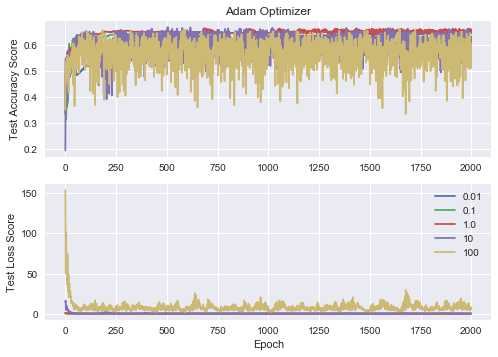

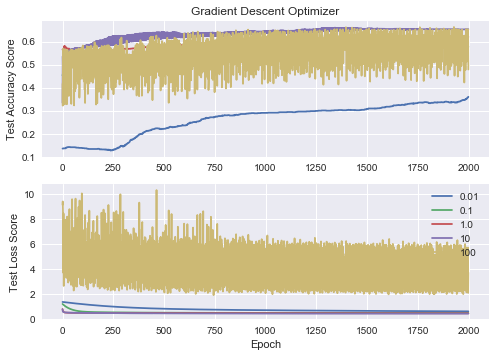

In [17]:
k = range(0, 2000)
for x in range(len(learning_rates)):
    plt.subplot(211)
    plt.plot(k, adam_acc_scores[x], label=learning_rates[x])
    plt.title('Adam Optimizer')
    plt.ylabel('Test Accuracy Score')
    plt.subplot(212)
    plt.plot(k, adam_test_loss_scores[x], label=learning_rates[x])
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss Score')
plt.legend()
plt.show()
for x in range(len(learning_rates)):
    plt.subplot(211)
    plt.plot(k, gdo_acc_scores[x], label=learning_rates[x])
    plt.title('Gradient Descent Optimizer')
    plt.ylabel('Test Accuracy Score')
    plt.subplot(212)
    plt.plot(k, gdo_test_loss_scores[x], label=learning_rates[x])
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss Score')
plt.legend()
plt.show()

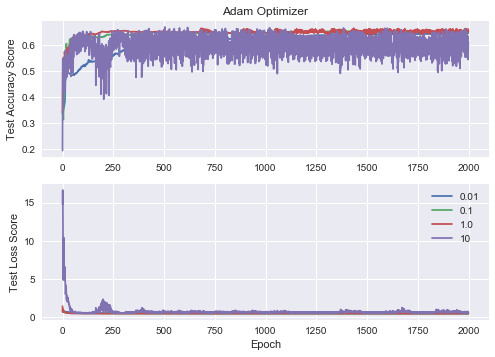

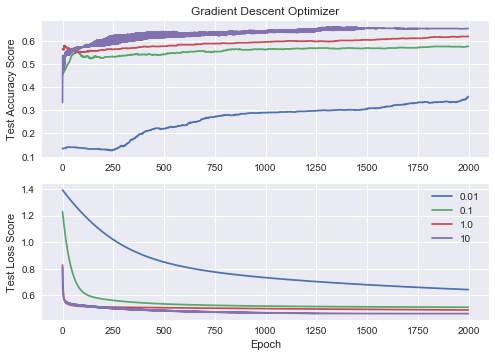

In [18]:
k = range(0, 2000)
for x in range(len(learning_rates)-1):
    plt.subplot(211)
    plt.plot(k, adam_acc_scores[x], label=learning_rates[x])
    plt.title('Adam Optimizer')
    plt.ylabel('Test Accuracy Score')
    plt.subplot(212)
    plt.plot(k, adam_test_loss_scores[x], label=learning_rates[x])
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss Score')
plt.legend()
plt.show()
for x in range(len(learning_rates)-1):
    plt.subplot(211)
    plt.plot(k, gdo_acc_scores[x], label=learning_rates[x])
    plt.title('Gradient Descent Optimizer')
    plt.ylabel('Test Accuracy Score')
    plt.subplot(212)
    plt.plot(k, gdo_test_loss_scores[x], label=learning_rates[x])
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss Score')
plt.legend()
plt.show()

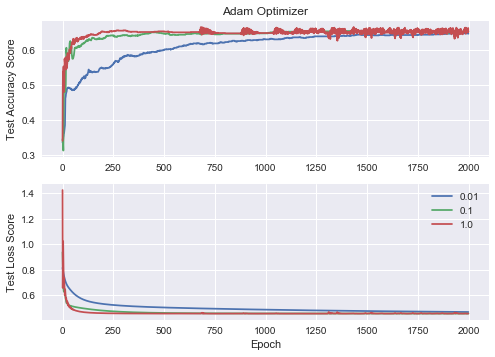

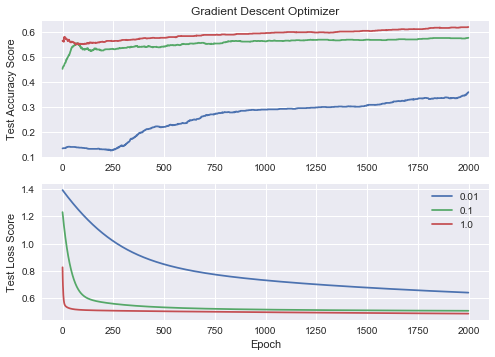

In [19]:
k = range(0, 2000)
for x in range(len(learning_rates)-2):
    plt.subplot(211)
    plt.plot(k, adam_acc_scores[x], label=learning_rates[x])
    plt.title('Adam Optimizer')
    plt.ylabel('Test Accuracy Score')
    plt.subplot(212)
    plt.plot(k, adam_test_loss_scores[x], label=learning_rates[x])
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss Score')
plt.legend()
plt.show()
for x in range(len(learning_rates)-2):
    plt.subplot(211)
    plt.plot(k, gdo_acc_scores[x], label=learning_rates[x])
    plt.title('Gradient Descent Optimizer')
    plt.ylabel('Test Accuracy Score')
    plt.subplot(212)
    plt.plot(k, gdo_test_loss_scores[x], label=learning_rates[x])
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss Score')
plt.legend()
plt.show()

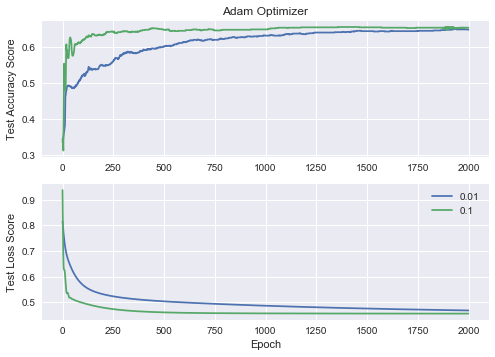

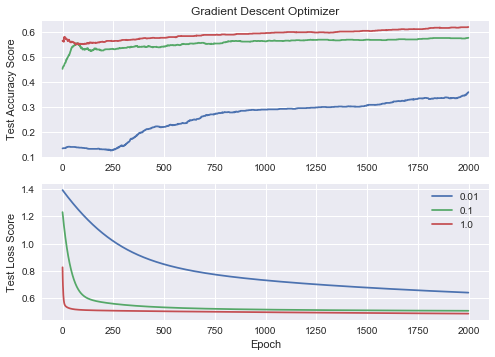

In [20]:
k = range(0, 2000)
for x in range(len(learning_rates)-3):
    plt.subplot(211)
    plt.plot(k, adam_acc_scores[x], label=learning_rates[x])
    plt.title('Adam Optimizer')
    plt.ylabel('Test Accuracy Score')
    plt.subplot(212)
    plt.plot(k, adam_test_loss_scores[x], label=learning_rates[x])
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss Score')
plt.legend()
plt.show()
for x in range(len(learning_rates)-2):
    plt.subplot(211)
    plt.plot(k, gdo_acc_scores[x], label=learning_rates[x])
    plt.title('Gradient Descent Optimizer')
    plt.ylabel('Test Accuracy Score')
    plt.subplot(212)
    plt.plot(k, gdo_test_loss_scores[x], label=learning_rates[x])
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss Score')
plt.legend()
plt.show()

* From above, it seems that the best learning rate for the Adam Optimizer and Gradient Descent Optimizer is 0.1 and 1.0 respectively.
* The Adam Optimizer's accuracy has stagnated, remaining practically the same since around epoch 500.
* Gradient Descent Optimizer on the other hand still seems as it can learn more from the data.

In [21]:
# Searching for when gradient descent optimizer stops increasing in accuracy
predictor.setup_graph(optimizer=tf.train.GradientDescentOptimizer, learning_rate=1.0)
predictor.run(epochs=15000)

Epoch: 50 | Loss: 0.5386370420455933
Epoch: 100 | Loss: 0.5246683955192566
Epoch: 150 | Loss: 0.5196877717971802
Epoch: 200 | Loss: 0.5170086026191711
Epoch: 250 | Loss: 0.5152014493942261
Epoch: 300 | Loss: 0.5138095021247864
Epoch: 350 | Loss: 0.5126386284828186
Epoch: 400 | Loss: 0.5115966200828552
Epoch: 450 | Loss: 0.5106338858604431
Epoch: 500 | Loss: 0.5097251534461975
Epoch: 550 | Loss: 0.5088547468185425
Epoch: 600 | Loss: 0.5080156326293945
Epoch: 650 | Loss: 0.5072004199028015
Epoch: 700 | Loss: 0.5064074993133545
Epoch: 750 | Loss: 0.5056335926055908
Epoch: 800 | Loss: 0.5048784613609314
Epoch: 850 | Loss: 0.5041393041610718
Epoch: 900 | Loss: 0.5034165978431702
Epoch: 950 | Loss: 0.502708911895752
Epoch: 1000 | Loss: 0.5020161271095276
Epoch: 1050 | Loss: 0.5013374090194702
Epoch: 1100 | Loss: 0.5006723999977112
Epoch: 1150 | Loss: 0.5000209212303162
Epoch: 1200 | Loss: 0.49938225746154785
Epoch: 1250 | Loss: 0.49875664710998535
Epoch: 1300 | Loss: 0.49814295768737793
Epoc

Epoch: 10500 | Loss: 0.4624166786670685
Epoch: 10550 | Loss: 0.4623662829399109
Epoch: 10600 | Loss: 0.4623166024684906
Epoch: 10650 | Loss: 0.46226733922958374
Epoch: 10700 | Loss: 0.4622184932231903
Epoch: 10750 | Loss: 0.4621700942516327
Epoch: 10800 | Loss: 0.46212202310562134
Epoch: 10850 | Loss: 0.46207454800605774
Epoch: 10900 | Loss: 0.46202775835990906
Epoch: 10950 | Loss: 0.46198105812072754
Epoch: 11000 | Loss: 0.4619348347187042
Epoch: 11050 | Loss: 0.4618890583515167
Epoch: 11100 | Loss: 0.46184438467025757
Epoch: 11150 | Loss: 0.4617993235588074
Epoch: 11200 | Loss: 0.46175462007522583
Epoch: 11250 | Loss: 0.46171072125434875
Epoch: 11300 | Loss: 0.46166685223579407
Epoch: 11350 | Loss: 0.46162381768226624
Epoch: 11400 | Loss: 0.4615808427333832
Epoch: 11450 | Loss: 0.4615384340286255
Epoch: 11500 | Loss: 0.4614965617656708
Epoch: 11550 | Loss: 0.461454838514328
Epoch: 11600 | Loss: 0.4614134132862091
Epoch: 11650 | Loss: 0.46137261390686035
Epoch: 11700 | Loss: 0.4613322

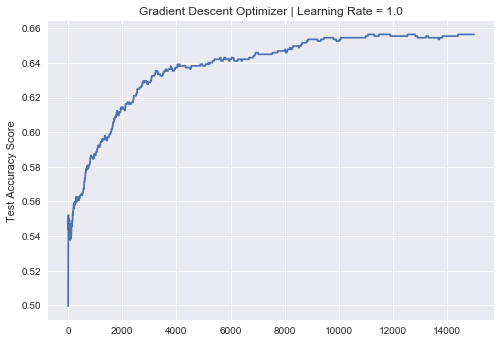

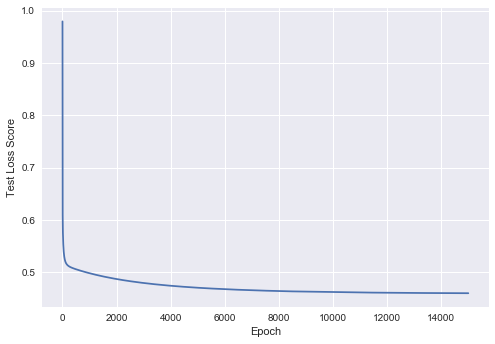

In [22]:
k = range(0, 15000)
plt.plot(k, predictor.test_acc)
plt.title('Gradient Descent Optimizer | Learning Rate = 1.0')
plt.ylabel('Test Accuracy Score')
plt.show()
plt.plot(k, predictor.test_loss_vec)
plt.xlabel('Epoch')
plt.ylabel('Test Loss Score')
plt.show()

In [23]:
predictor.setup_graph(optimizer=tf.train.AdamOptimizer, learning_rate=0.1)
predictor.run(epochs=15000)

Epoch: 50 | Loss: 0.5192819237709045
Epoch: 100 | Loss: 0.5021727085113525
Epoch: 150 | Loss: 0.4912886917591095
Epoch: 200 | Loss: 0.48316338658332825
Epoch: 250 | Loss: 0.4771360158920288
Epoch: 300 | Loss: 0.47263389825820923
Epoch: 350 | Loss: 0.4692341387271881
Epoch: 400 | Loss: 0.466632604598999
Epoch: 450 | Loss: 0.4646107852458954
Epoch: 500 | Loss: 0.4630136787891388
Epoch: 550 | Loss: 0.46173086762428284
Epoch: 600 | Loss: 0.460684210062027
Epoch: 650 | Loss: 0.459818959236145
Epoch: 700 | Loss: 0.45909616351127625
Epoch: 750 | Loss: 0.45848727226257324
Epoch: 800 | Loss: 0.4579715430736542
Epoch: 850 | Loss: 0.4575330317020416
Epoch: 900 | Loss: 0.45715969800949097
Epoch: 950 | Loss: 0.45684176683425903
Epoch: 1000 | Loss: 0.4565715491771698
Epoch: 1050 | Loss: 0.4563412368297577
Epoch: 1100 | Loss: 0.4561452269554138
Epoch: 1150 | Loss: 0.45597901940345764
Epoch: 1200 | Loss: 0.45583751797676086
Epoch: 1250 | Loss: 0.45571696758270264
Epoch: 1300 | Loss: 0.4556143581867218

Epoch: 10500 | Loss: 0.45493224263191223
Epoch: 10550 | Loss: 0.45493245124816895
Epoch: 10600 | Loss: 0.4549625515937805
Epoch: 10650 | Loss: 0.4550338387489319
Epoch: 10700 | Loss: 0.4549657702445984
Epoch: 10750 | Loss: 0.45493265986442566
Epoch: 10800 | Loss: 0.454932302236557
Epoch: 10850 | Loss: 0.45503926277160645
Epoch: 10900 | Loss: 0.45493343472480774
Epoch: 10950 | Loss: 0.4549392759799957
Epoch: 11000 | Loss: 0.45493271946907043
Epoch: 11050 | Loss: 0.4549323618412018
Epoch: 11100 | Loss: 0.45493224263191223
Epoch: 11150 | Loss: 0.4550707936286926
Epoch: 11200 | Loss: 0.4550478756427765
Epoch: 11250 | Loss: 0.45496493577957153
Epoch: 11300 | Loss: 0.4549325108528137
Epoch: 11350 | Loss: 0.45493242144584656
Epoch: 11400 | Loss: 0.45493242144584656
Epoch: 11450 | Loss: 0.4549943506717682
Epoch: 11500 | Loss: 0.4549892544746399
Epoch: 11550 | Loss: 0.45493313670158386
Epoch: 11600 | Loss: 0.4549531936645508
Epoch: 11650 | Loss: 0.45493242144584656
Epoch: 11700 | Loss: 0.454932

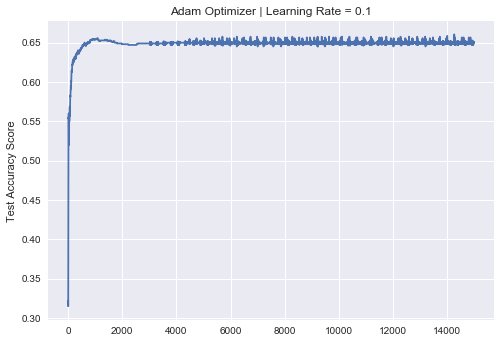

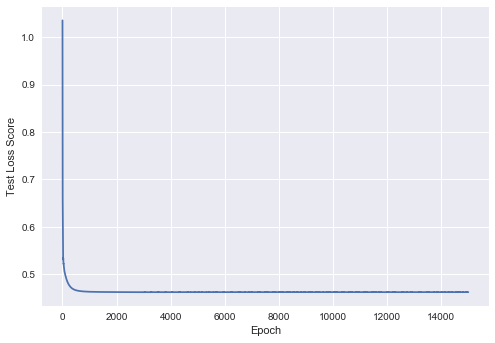

In [24]:
k = range(0, 15000)
plt.plot(k, predictor.test_acc)
plt.title('Adam Optimizer | Learning Rate = 0.1')
plt.ylabel('Test Accuracy Score')
plt.show()
plt.plot(k, predictor.test_loss_vec)
plt.xlabel('Epoch')
plt.ylabel('Test Loss Score')
plt.show()

* Gradient Descent Optimizer seems more reliable than the Adam Optimizer (improper epoch selection can lead to variable test accuracy), but training time is sacrificed in terms of the number of epochs required to obtain similar testing accuracies.

In [25]:
# Demonstrating how to load in new data to test
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, random_state=5)

submission = multi_class_classification(X=Xtrain, y=ytrain)
submission.split_data()
submission.setup_graph(optimizer=tf.train.GradientDescentOptimizer, learning_rate=1.0)
submission.run(epochs=15000, newX=Xtest)

Epoch: 50 | Loss: 0.5471810102462769
Epoch: 100 | Loss: 0.5314507484436035
Epoch: 150 | Loss: 0.525094747543335
Epoch: 200 | Loss: 0.5213460326194763
Epoch: 250 | Loss: 0.5187799334526062
Epoch: 300 | Loss: 0.5168573260307312
Epoch: 350 | Loss: 0.515317440032959
Epoch: 400 | Loss: 0.5140169262886047
Epoch: 450 | Loss: 0.512872576713562
Epoch: 500 | Loss: 0.5118365287780762
Epoch: 550 | Loss: 0.5108758211135864
Epoch: 600 | Loss: 0.5099716186523438
Epoch: 650 | Loss: 0.5091102123260498
Epoch: 700 | Loss: 0.5082833766937256
Epoch: 750 | Loss: 0.5074844360351562
Epoch: 800 | Loss: 0.5067099928855896
Epoch: 850 | Loss: 0.5059565901756287
Epoch: 900 | Loss: 0.5052224397659302
Epoch: 950 | Loss: 0.5045046806335449
Epoch: 1000 | Loss: 0.5038032531738281
Epoch: 1050 | Loss: 0.5031170845031738
Epoch: 1100 | Loss: 0.5024449229240417
Epoch: 1150 | Loss: 0.5017864108085632
Epoch: 1200 | Loss: 0.5011412501335144
Epoch: 1250 | Loss: 0.5005085468292236
Epoch: 1300 | Loss: 0.49988853931427
Epoch: 1350

Epoch: 10500 | Loss: 0.4626713693141937
Epoch: 10550 | Loss: 0.46261727809906006
Epoch: 10600 | Loss: 0.4625636637210846
Epoch: 10650 | Loss: 0.46251043677330017
Epoch: 10700 | Loss: 0.4624581038951874
Epoch: 10750 | Loss: 0.46240589022636414
Epoch: 10800 | Loss: 0.46235421299934387
Epoch: 10850 | Loss: 0.4623032808303833
Epoch: 10900 | Loss: 0.46225273609161377
Epoch: 10950 | Loss: 0.4622024893760681
Epoch: 11000 | Loss: 0.462152898311615
Epoch: 11050 | Loss: 0.4621036946773529
Epoch: 11100 | Loss: 0.46205469965934753
Epoch: 11150 | Loss: 0.46200665831565857
Epoch: 11200 | Loss: 0.46195897459983826
Epoch: 11250 | Loss: 0.46191146969795227
Epoch: 11300 | Loss: 0.4618643820285797
Epoch: 11350 | Loss: 0.461818128824234
Epoch: 11400 | Loss: 0.4617716073989868
Epoch: 11450 | Loss: 0.461726576089859
Epoch: 11500 | Loss: 0.4616810977458954
Epoch: 11550 | Loss: 0.4616363048553467
Epoch: 11600 | Loss: 0.46159207820892334
Epoch: 11650 | Loss: 0.46154770255088806
Epoch: 11700 | Loss: 0.461504459

In [26]:
submission.test_preds

array([[ 0.10617781, -0.71348834, -1.63334656],
       [-1.24506283, -0.7011857 , -0.69872928],
       [-4.18883801, -0.17448997,  0.73274589],
       ..., 
       [-1.08786154, -0.2987442 , -0.87510741],
       [-2.20393562, -0.23061395, -0.60532403],
       [-1.65710545, -0.02623272, -0.53092837]], dtype=float32)

In [27]:
ytest

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ..., 
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [28]:
preds = []
true = []
for pred in submission.test_preds:
    max_index = np.argmax(pred)
    preds.append(max_index)
for val in ytest:
    max_index = np.argmax(val)
    true.append(max_index)  
print('Accuracy: {0}'.format(accuracy_score(preds, true)))

Accuracy: 0.6555023923444976
